# K-means clustering and Gaussian Mixture Models (GMM) clustering

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

## Clustering

### K-means clustering

In [521]:
# Reading the cluster data
cluster_data=pd.read_csv("/Users/krishnakamaladidam/Downloads/cluster.txt",sep=" ", header=None,comment='#')

In [522]:
# Taking only the first two columns without labels
cluster_data_without_labels=cluster_data.drop([2],axis=1)

#### Performing K-means clustering on the data

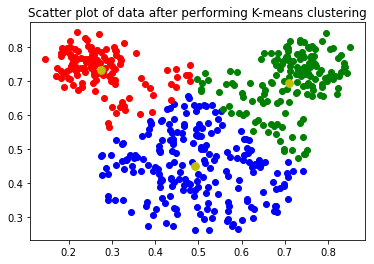

In [525]:
import sklearn as sklearn
from sklearn import cluster
K_means=(sklearn.cluster.KMeans(n_clusters=3))
K_means_labels=K_means.fit_predict(cluster_data_without_labels)
# Plotting the data after performing K-means clustering
plt.title("Scatter plot of data after performing K-means clustering")
plt.scatter(cluster_data_without_labels[K_means_labels==0][0],cluster_data_without_labels[K_means_labels==0][1],c='b')
plt.scatter(cluster_data_without_labels[K_means_labels==1][0],cluster_data_without_labels[K_means_labels==1][1],c='r')
plt.scatter(cluster_data_without_labels[K_means_labels==2][0],cluster_data_without_labels[K_means_labels==2][1],c='g')
plt.scatter(K_means.cluster_centers_[:,0],K_means.cluster_centers_[:,1],s=60,c='y')
plt.show()

In [526]:
#Centroids for each cluster
print("Centroid for each cluster are:")
print(K_means.cluster_centers_)

Centroid for each cluster are:
[[0.49244835 0.44985859]
 [0.27459845 0.73311733]
 [0.71042841 0.6952667 ]]


In [528]:
#Making new list which consists of categorical labels as numbers
labels_number_list=[]
for i in range(len(cluster_data[2])):
    if cluster_data[2][i]=='Head':
        labels_number_list.append(0)
    elif cluster_data[2][i]=='Ear_left':
        labels_number_list.append(1)
    elif cluster_data[2][i]=='Ear_right':
        labels_number_list.append(2)

#### Generating a confusion matrix after performing K-means clustering

In [529]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix=confusion_matrix(labels_number_list,K_means_labels)
print("confusion matrix for K-means clustering is:")
print(confusion_matrix)
accuracy_score=(confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2])/np.sum(confusion_matrix)*100
# Showing the accuracy score for K-means
print("Accuracy score for K-means clustering is: {0}".format(accuracy_score))

confusion matrix for K-means clustering is:
[[211  25  54]
 [  0 100   0]
 [  0   0 100]]
Accuracy score for K-means clustering is: 83.87755102040816


### Clustering using GMM

#### initializing membership probabilities (Gamma) as One-hot vectors

In [530]:
membership_probabilities=[]
for i in range(len(K_means_labels)):
    if(K_means_labels[i]==0):
        membership_probabilities.append(np.array([1,0,0]))
    elif(K_means_labels[i]==1):
        membership_probabilities.append(np.array([0,1,0]))
    elif(K_means_labels[i]==2):
        membership_probabilities.append(np.array([0,0,1]))
gamma_array=np.array(membership_probabilities)

In [531]:
# Converting the pandas dataframe of cluster data into numpy array
cluster_data_numpy=np.asarray(cluster_data_without_labels)

#### Function for M-step

In [532]:
# function takes the input data, gamma, overall size of data and K=3(no.of mixture components)
def Maximization_step(gamma,input_data,size,K):
    # Weights initialization
    weights_matrix=[]
    weights_matrix=((np.sum(gamma,axis=0)/size).reshape(3,1))
    
    # Finding Means
    mean_matrix=(np.matmul(gamma.T,input_data)/((np.sum(gamma,axis=0)).reshape(3,1)))
    
    #Finding the Covariance matrix
    covariance_matrix=[]
    for i in range(K):
        result=0
        for j in range(len(input_data)):
            mat=(input_data[j]-mean_matrix[i]).reshape(2,1)
            result+=gamma[j,i]*np.matmul(mat,mat.T)
        covariance_matrix.append(result/sum(gamma[:,i]))
    covariance_matrix=np.asarray(covariance_matrix)
    
    return weights_matrix, mean_matrix, covariance_matrix

#### Function for E-step

In [533]:
# function returns the updated membership probabilities (Gamma) and the log likelihood which decides the convergence
def Expectation_step(K,input_data, mean_matrix, covariance_matrix, weights_matrix):
    
    #pdf for multivariate normal distribution
    pdf=[]
    for i in range(K):
        f=scipy.stats.multivariate_normal.pdf(input_data,mean_matrix[i,:],covariance_matrix[i,:,:])
        pdf.append(f)
    pdf=np.asarray(pdf).T #Converting list to numpy array
    
    # Calculating membership probabailities again
    new_gamma=[]
    for i in range(K):
        g=weights_matrix[i]*pdf[:,i]
        new_gamma.append(g)
    new_gamma=np.array(new_gamma).T
    log_likelihood=np.sum(np.log(new_gamma.sum(axis=1).reshape(490,1)))
    new_gamma=new_gamma/(new_gamma.sum(axis=1).reshape(490,1))
    
    return new_gamma, log_likelihood   

#### Function which assigns each datapoint to mixture component with the largest probability

In [534]:
def assigning_classes_from_probabilities(gamma_list):
    classes_list=[]
    for i in range(len(new_gamma)):
        if (new_gamma[i,0]>new_gamma[i,1] and new_gamma[i,0]>new_gamma[i,2]):
            classes_list.append(0)
        elif(new_gamma[i,1]>new_gamma[i,0] and new_gamma[i,1]>new_gamma[i,2]):
            classes_list.append(1)
        elif(new_gamma[i,2]>new_gamma[i,0] and new_gamma[i,2]>new_gamma[i,1]):
            classes_list.append(2)
    return np.array(classes_list)

#### Function to Plot the cluster data after performing GMM clustering

In [535]:
def plotting_data(cluster_data_numpy,classes_list):
    plt.title("Scatter plot of data after performing Gaussian Mixture Models clustering")
    plt.scatter(cluster_data_numpy[classes_list==0,0],cluster_data_numpy[classes_list==0,1],c='b')
    plt.scatter(cluster_data_numpy[classes_list==1,0],cluster_data_numpy[classes_list==1,1],c='r')
    plt.scatter(cluster_data_numpy[classes_list==2,0],cluster_data_numpy[classes_list==2,1],c='g')
    plt.show()

#### Performing the GMM until convergence

Scatter plots showing the class assignments during the  first four iterations


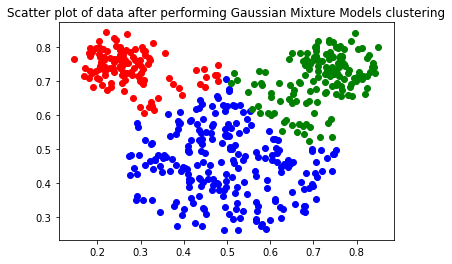

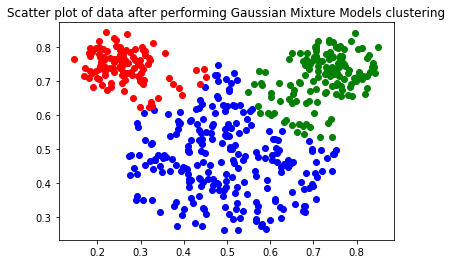

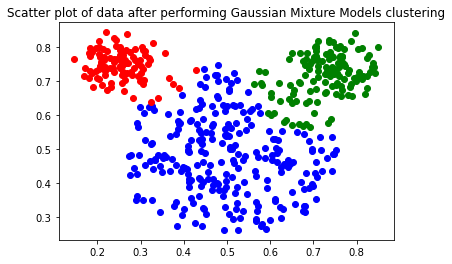

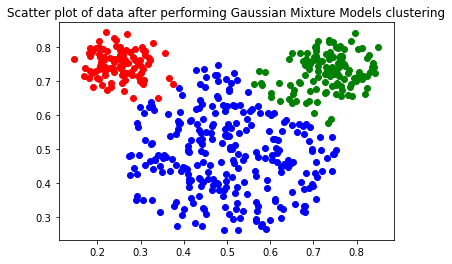

Final cluster plot after GMM converges


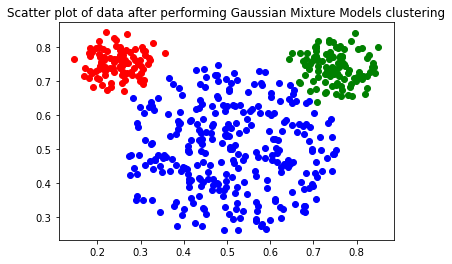

In [536]:
log_likelihood_list=[]
count=0
print("Scatter plots showing the class assignments during the  first four iterations")
while len(log_likelihood_list)==0 or len(log_likelihood_list)==1 or ((log_likelihood_list[-1])-(log_likelihood_list[-2]))>=(10**-4):
    weights_matrix, mean_matrix, covariance_matrix=Maximization_step(gamma_array,cluster_data_numpy,490,3)
    new_gamma, log_likelihood=Expectation_step(3,cluster_data_numpy,mean_matrix,covariance_matrix,weights_matrix)
    classes_list=assigning_classes_from_probabilities(gamma_array)
    gamma_array=new_gamma
    if count<=3:
        plotting_data(cluster_data_numpy,classes_list)
    log_likelihood_list.append(log_likelihood)
    count+=1
print("Final cluster plot after GMM converges")
plotting_data(cluster_data_numpy,classes_list)

#### Generating the confusion matrix after performing GMM and finding the accuracy after convergence

In [537]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix_GMM=confusion_matrix(labels_number_list,classes_list)
print("confusion matrix for GMM is:")
print(confusion_matrix_GMM)
accuracy_score_GMM=(confusion_matrix_GMM[0][0]+confusion_matrix_GMM[1][1]+confusion_matrix_GMM[2][2])/np.sum(confusion_matrix_GMM)*100
print("Accuracy score for GMM clustering is: {0}".format(accuracy_score_GMM))

confusion matrix for GMM is:
[[289   0   1]
 [  1  99   0]
 [  0   0 100]]
Accuracy score for GMM clustering is: 99.59183673469387


<AxesSubplot:>

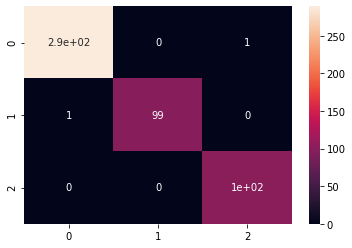

In [5]:
sns.heatmap(confusion_matrix_GMM, annot=True)

### Comment on difference between the clustering result: Right from the first iteration, GMM seemed to show better accuracy and performs better. Obviously after the convergence, GMM has excellent accuracy (99.59 %) and classifies accurately as seen in the scatter plots. 